In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [ ]:
dataset = pd.read_excel("final DSS1.xlsx")
dataset.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Mumbai,-0.209082,1.0,2.0,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Mumbai,-0.173647,1.0,2.0,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Mumbai,-0.210215,1.0,3.0,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Mumbai,-0.202731,1.0,4.0,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Mumbai,-0.192487,1.0,2.0,Dry,NaN,Urban,NaN,Other vehicle


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

 # Data Cleaning and Preprocessing

In [ ]:
# checking missing values
dataset.isna().sum()

,0
Index,0
Accident_Severity,0
Accident Date,0
Latitude,0
Light_Conditions,0
District Area,0
Longitude,1
Number_of_Casualties,1
Number_of_Vehicles,1
Road_Surface_Conditions,175


In [ ]:
# using mean, median and mode value imputation
dataset['Road_Surface_Conditions'] = dataset['Road_Surface_Conditions'].fillna(dataset['Road_Surface_Conditions'].mode().iloc[0])



In [ ]:
dataset['Road_Type'] = dataset['Road_Type'].fillna(dataset['Road_Type'].mode().iloc[0])

In [ ]:
dataset['Weather_Conditions'] = dataset['Weather_Conditions'].fillna(dataset['Weather_Conditions'].mode().iloc[0])

In [ ]:
dataset.isna().sum()

,0
Index,0
Accident_Severity,0
Accident Date,0
Latitude,0
Light_Conditions,0
District Area,0
Longitude,1
Number_of_Casualties,1
Number_of_Vehicles,1
Road_Surface_Conditions,0


In [ ]:
# mean value imputation
dataset['Longitude'] = dataset['Longitude'].fillna(dataset['Longitude'].mean())
dataset['Number_of_Casualties'] = dataset['Number_of_Casualties'].fillna(dataset['Number_of_Casualties'].mean())
dataset['Number_of_Vehicles'] = dataset['Number_of_Vehicles'].fillna(dataset['Number_of_Vehicles'].mean())
dataset['Urban_or_Rural_Area'] = dataset['Urban_or_Rural_Area'].fillna(dataset['Urban_or_Rural_Area'].mode().iloc[0])
dataset['Vehicle_Type'] = dataset['Vehicle_Type'].fillna(dataset['Vehicle_Type'].mode().iloc[0])


In [ ]:
dataset.isna().sum()

,0
Index,0
Accident_Severity,0
Accident Date,0
Latitude,0
Light_Conditions,0
District Area,0
Longitude,0
Number_of_Casualties,0
Number_of_Vehicles,0
Road_Surface_Conditions,0


In [ ]:
dataset.describe()

,Accident Date,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,97535,97535.000000,97535.000000,97535.000000,97535.000000
mean,2019-07-02 06:17:19.306915328,52.949345,-1.423744,1.365339,1.834673
min,2019-01-01 00:00:00,51.292694,-3.599412,1.000000,1.000000
25%,2019-04-04 00:00:00,52.192860,-2.158090,1.000000,1.000000
50%,2019-07-02 00:00:00,53.103428,-1.533747,1.000000,2.000000
75%,2019-10-01 00:00:00,53.634488,-0.368630,1.000000,2.000000
max,2019-12-31 00:00:00,55.785544,0.350513,40.000000,14.000000
std,NaN,1.018407,0.953069,0.830961,0.696781


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97535 entries, 0 to 97534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Index                    97535 non-null  object        
 1   Accident_Severity        97535 non-null  object        
 2   Accident Date            97535 non-null  datetime64[ns]
 3   Latitude                 97535 non-null  float64       
 4   Light_Conditions         97535 non-null  object        
 5   District Area            97535 non-null  object        
 6   Longitude                97535 non-null  float64       
 7   Number_of_Casualties     97535 non-null  float64       
 8   Number_of_Vehicles       97535 non-null  float64       
 9   Road_Surface_Conditions  97535 non-null  object        
 10  Road_Type                97535 non-null  object        
 11  Urban_or_Rural_Area      97535 non-null  object        
 12  Weather_Conditions       97535 n

In [ ]:
dataset.duplicated().sum()

1

In [ ]:
dataset.drop_duplicates()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Mumbai,-0.209082,1.000000,2.000000,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Mumbai,-0.173647,1.000000,2.000000,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Mumbai,-0.210215,1.000000,3.000000,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Mumbai,-0.202731,1.000000,4.000000,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Mumbai,-0.192487,1.000000,2.000000,Dry,Single carriageway,Urban,Fine no high winds,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97530,2010000000000,Slight,2019-08-29,52.654498,Daylight,Chhindwara,-1.137373,1.000000,1.000000,Dry,Dual carriageway,Urban,Fine no high winds,Car
97531,2010000000000,Slight,2019-08-28,52.651503,Daylight,Chhindwara,-1.121171,1.000000,2.000000,Dry,Single carriageway,Urban,Fine no high winds,Car
97532,2010000000000,Slight,2019-08-29,52.716023,Daylight,Ujjain,-1.105367,1.000000,2.000000,Dry,Single carriageway,Rural,Fine no high winds,Motorcycle 50cc and under
97533,2010000000000,Slight,2019-08-30,52.496985,Daylight,Murwara,-1.255946,1.000000,2.000000,Dry,Single carriageway,Rural,Fine no high winds,Goods 7.5 tonnes mgw and over


# EDA

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97535 entries, 0 to 97534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Index                    97535 non-null  object        
 1   Accident_Severity        97535 non-null  object        
 2   Accident Date            97535 non-null  datetime64[ns]
 3   Latitude                 97535 non-null  float64       
 4   Light_Conditions         97535 non-null  object        
 5   District Area            97535 non-null  object        
 6   Longitude                97535 non-null  float64       
 7   Number_of_Casualties     97535 non-null  float64       
 8   Number_of_Vehicles       97535 non-null  float64       
 9   Road_Surface_Conditions  97535 non-null  object        
 10  Road_Type                97535 non-null  object        
 11  Urban_or_Rural_Area      97535 non-null  object        
 12  Weather_Conditions       97535 n

In [ ]:
dataset.describe()

,Accident Date,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,97535,97535.000000,97535.000000,97535.000000,97535.000000
mean,2019-07-02 06:17:19.306915328,52.949345,-1.423744,1.365339,1.834673
min,2019-01-01 00:00:00,51.292694,-3.599412,1.000000,1.000000
25%,2019-04-04 00:00:00,52.192860,-2.158090,1.000000,1.000000
50%,2019-07-02 00:00:00,53.103428,-1.533747,1.000000,2.000000
75%,2019-10-01 00:00:00,53.634488,-0.368630,1.000000,2.000000
max,2019-12-31 00:00:00,55.785544,0.350513,40.000000,14.000000
std,NaN,1.018407,0.953069,0.830961,0.696781


In [ ]:
dataset.size

1365490

In [ ]:
dataset.shape

(97535, 14)

In [ ]:
dataset.isna().sum()

,0
Index,0
Accident_Severity,0
Accident Date,0
Latitude,0
Light_Conditions,0
District Area,0
Longitude,0
Number_of_Casualties,0
Number_of_Vehicles,0
Road_Surface_Conditions,0


In [ ]:
dataset.duplicated().sum()

1

In [ ]:
dataset.drop_duplicates(inplace = True)
dataset.duplicated().sum()

0

data visualization

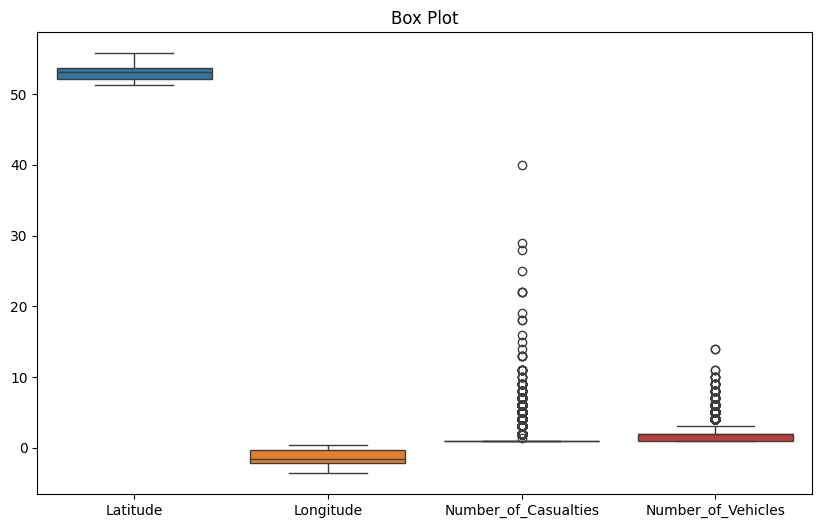

In [ ]:
# outlier detection using boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=dataset)
plt.title("Box Plot")
plt.show()

-> Their are too many outliers in number of casualities and number of vehicles

In [ ]:
# As thier are too many outliers we will transform the data to reduce the effect of outliers
dataset['Number_of_Casualties'] = np.log1p(dataset['Number_of_Casualties'])
dataset['Number_of_Vehicles'] = np.log1p(dataset['Number_of_Vehicles'])

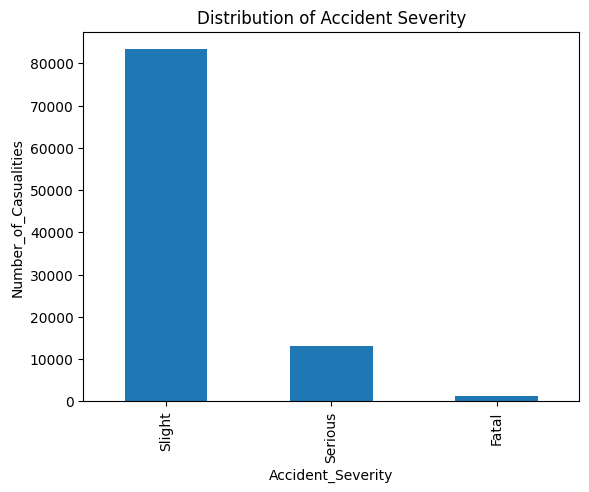

In [ ]:
# visualizing time series data
# Plot the distribution of accident severity
dataset['Accident_Severity'].value_counts().plot(kind='bar')
plt.title('Distribution of Accident Severity')
plt.xlabel('Accident_Severity')
plt.ylabel('Number_of_Casualities')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_features = ['Latitude', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles']
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])
scaled_data = dataset[numerical_features]
sacled_data = scaled_data.values

In [ ]:
# Extract day of the week from the date
dataset['Day_of_Week'] = dataset['Accident Date'].dt.dayofweek

In [ ]:
print(f"Scaled data type: {type(scaled_data)}")
print(f"Scaled data shape: {scaled_data.shape}")


Scaled data type: <class 'pandas.core.frame.DataFrame'>
Scaled data shape: (97534, 4)


In [ ]:
def create_sequences(dataset, seq_length):
    X, y = [], []
    for i in range(len(dataset) - seq_length):
        X.append(dataset[i:i + seq_length])
        y.append(dataset[i + seq_length])
    return np.array(X), np.array(y)

# Assuming scaled_data is a DataFrame with a single column
scaled_data = scaled_data.iloc[:, 0].values  # Extract the column as a NumPy array


In [ ]:
seq_length = 10  # Example sequence length
X, y = create_sequences(scaled_data, seq_length)

# Train Test Split

In [ ]:
!pip install keras
!pip install tensorflow

In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - loss: 0.0033
Epoch 2/100
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 4.4321e-04
Epoch 3/100
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 3.9797e-04
Epoch 4/100
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 3.9603e-04
Epoch 5/100
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 3.9676e-04
Epoch 6/100
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 3.6452e-04
Epoch 7/100
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 3.7858e-04
Epoch 8/100
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 3.6571e-04
Epoch 9/100
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 3.7236e-04
Epoch 10/100
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 3.6806e-04
Epoch 11/100
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 3.7117e-04
Epoch 12/100
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 3.7278e-04
Epoch 13/100
2439/2439 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 3.9188e-04
Epoch 14/100
2439/2439 ━━

# Random Forest

In [2]:
dataset = pd.read_excel('final DSS1.xlsx', parse_dates=['Accident Date'], index_col='Accident Date')

In [3]:
dataset['Day_of_Week'] = dataset.index.dayofweek
dataset = pd.get_dummies(dataset, columns=['Weather_Conditions'])

In [4]:
target = "Accident_Severity"
columns_to_drop = [target, 'Index', 'Accident Date']
existing_columns = [col for col in columns_to_drop if col in dataset.columns]
Xr = dataset.drop(columns=existing_columns)
yr = dataset['Accident_Severity']

In [5]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = Xr_train.select_dtypes(include=['object']).columns

# Apply Label Encoding (or One-Hot Encoding if needed)
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    Xr_train[col] = le.fit_transform(Xr_train[col].astype(str))
    Xr_test[col] = le.transform(Xr_test[col].astype(str))
    label_encoders[col] = le  # Save encoders for later use (if needed)

# Ensure all features are numeric now
print(Xr_train.dtypes)

NameError: name 'Xr_train' is not defined

In [6]:
from sklearn.model_selection import train_test_split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state=42)

In [7]:
# Fill missing values in categorical columns
from sklearn.compose import make_column_selector

# Fill missing values in categorical columns
categorical_selector = make_column_selector(dtype_include=['object'])
categorical_cols = categorical_selector(Xr_train)

Xr_train[categorical_cols] = Xr_train[categorical_cols].fillna('Unknown')
Xr_test[categorical_cols] = Xr_test[categorical_cols].fillna('Unknown')


In [8]:
# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    Xr_train[col] = le.fit_transform(Xr_train[col].astype(str))
    # Handle unseen labels in test data
    Xr_test[col] = Xr_test[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
    label_encoders[col] = le

In [9]:
# Confirm no missing values or non-numeric columns remain
print(Xr_train.isnull().sum())
print(Xr_test.isnull().sum())
print(Xr_train.dtypes)

Latitude                                    0
Light_Conditions                            0
District Area                               0
Longitude                                   0
Number_of_Casualties                        0
Number_of_Vehicles                          0
Road_Surface_Conditions                     0
Road_Type                                   0
Urban_or_Rural_Area                         0
Vehicle_Type                                0
Day_of_Week                                 0
Weather_Conditions_Fine + high winds        0
Weather_Conditions_Fine no high winds       0
Weather_Conditions_Fog or mist              0
Weather_Conditions_Other                    0
Weather_Conditions_Raining + high winds     0
Weather_Conditions_Raining no high winds    0
Weather_Conditions_Snowing + high winds     0
Weather_Conditions_Snowing no high winds    0
dtype: int64
Latitude                                    0
Light_Conditions                            0
District Area        

In [10]:
Xr_test['Number_of_Casualties'] = Xr_test['Number_of_Casualties'].fillna(Xr_test['Number_of_Casualties'].mean())
Xr_test['Number_of_Vehicles'] = Xr_test['Number_of_Vehicles'].fillna(Xr_test['Number_of_Vehicles'].mean())
Xr_test['Longitude'] = Xr_test['Longitude'].fillna(Xr_test['Longitude'].mean())

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(Xr_train, yr_train)

RandomForestClassifier(random_state=42)

In [12]:
print(yr_test.unique())

['Slight' 'Serious' 'Fatal']


In [13]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Define the target classes manually in the desired order
label_encoder.classes_ = np.array(['Slight', 'Serious', 'Fatal'])  # Ensure it's a NumPy array

# Convert the target variables to NumPy arrays (if not already)
yr_train = np.array(yr_train)
yr_test = np.array(yr_test)

# Encode the target variables
yr_train_encoded = label_encoder.transform(yr_train)
yr_test_encoded = label_encoder.transform(yr_test)

# Verify encoding
print("Encoded values:", label_encoder.classes_)
print("Encoded y_train:", yr_train_encoded[:5])
print("Encoded y_test:", yr_test_encoded[:5])


Encoded values: ['Slight' 'Serious' 'Fatal']
Encoded y_train: [0 0 0 0 0]
Encoded y_test: [0 0 1 0 0]


In [14]:
from sklearn.metrics import mean_squared_error

rf_predictions = rf_model.predict(Xr_test)
rf_rmse = mean_squared_error(yr_test, rf_predictions, squared=False)
print(f'Random Forest RMSE: {rf_rmse}')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ValueError: could not convert string to float: 'Slight'

In [ ]:
from sklearn.metrics import root_mean_squared_error

rf_rmse = root_mean_squared_error(yr_test, rf_predictions)
print(f'Random Forest RMSE: {rf_rmse}')

ValueError: could not convert string to float: 'Slight'